# HW 3
Submitted by: Trixelle Johanna Juan Tong

*Quick Navigation*

Solutions for the [Questions](#questions)

In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

# for model validation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Load advertising dataset

In [2]:
# loading the dataset using pandas read_csv() function
advertising_df = pd.read_csv("Advertising.csv", index_col=0)
advertising_df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


## Standardize each column of the dataset

In [3]:
# used scale() method of sklearn.preprocessing
standardized_df = scale(advertising_df)

# transform into a dataframe
standardized_df = pd.DataFrame(standardized_df, columns=advertising_df.columns)
standardized_df

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


## Adding an extra column composing of 1s to X

In [4]:
# adds a column with values of 1 in the dataframe
# this will be used for the bias term
standardized_df.insert(0, 'bias', 1)
standardized_df

,bias,TV,Radio,Newspaper,Sales
0,1,0.969852,0.981522,1.778945,1.552053
1,1,-1.197376,1.082808,0.669579,-0.696046
2,1,-1.516155,1.528463,1.783549,-0.907406
3,1,0.052050,1.217855,1.286405,0.860330
4,1,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...,...
195,1,-1.270941,-1.321031,-0.771217,-1.234053
196,1,-0.617035,-1.240003,-1.033598,-0.830548
197,1,0.349810,-0.942899,-1.111852,-0.234898
198,1,1.594565,1.265121,1.640850,2.205347


In [5]:
# store response variable to y
y = standardized_df["Sales"]

# store all predictor values to x 
x = standardized_df.drop("Sales", axis=1)

## Divide the dataset into training and testing
We will divide it with the ratio 85:15

In [6]:
# Training and testing dataset split with ratio 85:15
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85, test_size=0.15)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (170, 4)
y_train size: (170,)

x_test size: (30, 4)
y_test size: (30,)


## Fitting the model on the training set

The functions included in this section are:
1. initialize_weights
2. predict
3. compute_cost
4. compute_gradient
5. update_weights
6. grad_descent
7. plot_costs

In [7]:
def initialize_weights():
    np.random.seed(10)  # will store the same random numbers
    init_w = np.random.uniform(0,1,4)  # randomize 4 numbers between 0 and 1
    return init_w

In [8]:
# see the values for bias and theta
weights = initialize_weights()

bias = weights[0]
theta = weights[1:]

print("bias: " + str(weights[0]))
print("theta: " + str(weights[1:]))

bias: 0.771320643266746
theta: [0.02075195 0.63364823 0.74880388]


In [9]:
# function to calculate the predicted values of y_hat
def predict(x, theta):
    y_hat = np.dot(x, theta)
    return y_hat

In [10]:
# function to calculate the cost of the predicted - actual y values
def compute_cost(y_hat, y, theta):
    m = len(y)  # number of samples
    
    # get the cost function
    # y_hat is the predicted value whereas y is the actual value
    cost = 1/(m*2) * np.sum(np.square(y_hat - y))
    return cost

In [11]:
def compute_gradient(x, y, theta):
    m = len(y)
    y_hat = predict(x, theta)
    w = 1/m * np.dot((y_hat - y), x)
    
    return w

In [12]:
def update_weights(w, theta, a):
    updated_weights = theta - a * w 
    return updated_weights

In [13]:
def grad_descent(x, y, theta, iterations, a):
    costs = []

    for i in range(iterations):
        # predict y
        y_hat = predict(x, theta) 
        
        # compute the cost
        cost = compute_cost(y_hat, y, weights)
        costs.append(cost) # add to cost list
        
        # compute the partial derivatives
        w = compute_gradient(x, y, theta)
        
        # update the weights
        theta = update_weights(w, theta, a)
        
    return theta, costs

In [14]:
# function to plot the cost over the iteration
def plot_costs(cost):
    plt.plot(cost)
    
    # set appropriate labels for the graph
    plt.title('Cost on Iteration')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()

#### Predict Y for train set and calculate the cost

In [15]:
# we will predict Y of the train set
y_hat_train = predict(x_train, weights)

# we will compare it the predicted values to the actual values
y_train_df = pd.DataFrame({'Predicted y_train': y_hat_train ,'Actual y_train': y_train})
display(y_train_df)

# calculate the cost
y_train_cost = compute_cost(y_hat_train, y_train, weights)
print("Cost: {}".format(y_train_cost))

,Predicted y_train,Actual y_train
35,-0.773998,-0.234898
112,-0.528640,0.014891
36,0.798206,2.186132
51,-0.753684,-0.638403
173,-0.527059,-0.446257
...,...,...
144,0.684535,-0.503901
63,0.268047,-0.004323
127,-0.976301,-1.003478
191,-0.625649,-0.792119


Cost: 0.9280926097983375


#### Predict Y for test set and calculate the cost

In [16]:
# we will predict Y of the train set
y_hat_test = predict(x_test, weights)

# we will compare it the predicted values to the actual values
y_test_df = pd.DataFrame({'Predicted y_test': y_hat_test ,'Actual y_test': y_test})
display(y_train_df)

# calculate the cost
y_test_cost = compute_cost(y_hat_test, y_test, weights)
print("Cost: {}".format(y_test_cost))

,Predicted y_train,Actual y_train
35,-0.773998,-0.234898
112,-0.528640,0.014891
36,0.798206,2.186132
51,-0.753684,-0.638403
173,-0.527059,-0.446257
...,...,...
144,0.684535,-0.503901
63,0.268047,-0.004323
127,-0.976301,-1.003478
191,-0.625649,-0.792119


Cost: 0.7148149186887327


## Predicting the quantitative response y on the train set and evaluating its performance

In [17]:
w_train, cost_train = grad_descent(x_train, y_train, weights, 10000, 0.01)

# we will predict y using the train set 
y_hat_train = predict(x_train, w_train)
y_train_df = pd.DataFrame({'Predicted y_train': y_hat_train ,'Actual y_train': y_train})
display(y_train_df)

# evaluate the performance using MSE
print("MSE: {}".format(mean_squared_error(y_train, y_hat_train)))

,Predicted y_train,Actual y_train
35,0.564296,-0.234898
112,-0.034816,0.014891
36,1.804728,2.186132
51,-0.909825,-0.638403
173,-0.403778,-0.446257
...,...,...
144,-0.762547,-0.503901
63,-0.160130,-0.004323
127,-1.439082,-1.003478
191,-1.085652,-0.792119


MSE: 0.10985403055302703


For the evaluation on the quantitative response y on the train set:
The MSE has a value of 0.10985, which we can say that the accuracy of the model towards predicting the sales is a bit good but may not be able to be that accurate in predicting the sales since using MSE enables us to check whether our estimates are close to the actual values (when MSE scores are closer to 0) or farther to the actual values (when MSE scores are higher).

## Predicting the quantitative response y on the test set and evaluating its performance

In [18]:
# we will predict y using the test set 
w_test, cost_test = grad_descent(x_test, y_test, weights, 10000, 0.01)

# use the optimized weights for prediction
y_hat_test = predict(x_test, w_test)
y_test_df = pd.DataFrame({'Predicted y_test': y_hat_test ,'Actual y_test': y_test})
display(y_test_df)

# evaluate the performance using MSE
print("MSE: {}".format(mean_squared_error(y_test, y_hat_test)))

,Predicted y_test,Actual y_test
189,-1.476997,-1.406983
81,0.166858,-0.330970
90,-0.712129,-0.542330
4,-0.125498,-0.215683
92,0.980333,1.033261
161,-0.085905,-0.138825
168,0.618759,0.591327
62,0.560911,0.322324
197,-0.186663,-0.234898
89,0.537883,0.514469


MSE: 0.061133278589991395


For the evaluation on the quantitative response y on the test set:
The MSE has a value of 0.06113, which is lower compared to the MSE score of the train set (MSE = 0.10985). With this in mind, the accuracy of the model towards predicting the actual values is better than that of the train set.

## Reverting the standardized data into the original form 

In [19]:
# creates a copy on the standardized df 
df_copy = standardized_df.copy()

df_copy.drop('bias', inplace=True, axis=1)

# reverting back the standardized data into the original form 
df_copy['TV'] = df_copy['TV'] * advertising_df['TV'].std() + advertising_df['TV'].mean()
df_copy['Radio'] = df_copy['Radio'] * advertising_df['Radio'].std() + advertising_df['Radio'].mean()
df_copy['Newspaper'] = df_copy['Newspaper'] * advertising_df['Newspaper'].std() + advertising_df['Newspaper'].mean()
df_copy['Sales'] = df_copy['Sales'] * advertising_df['Sales'].std() + advertising_df['Sales'].mean()

df_copy

,TV,Radio,Newspaper,Sales
0,230.308426,37.836477,69.296979,22.120270
1,44.242678,39.340241,45.136502,10.390910
2,16.874171,45.956803,69.397230,9.288149
3,151.511186,41.345260,58.570128,18.511236
4,180.884712,10.768723,58.469877,12.897183
...,...,...,...,...
195,37.926869,3.650906,13.757957,7.583883
196,94.067396,4.853917,8.043654,9.689153
197,177.075176,9.264959,6.339388,12.796932
198,283.942679,42.047016,66.289451,25.528802


## Observe cost results and analyze
We will be plotting the cost generated on both train and test set to see if there are any notable analysis we can get from it

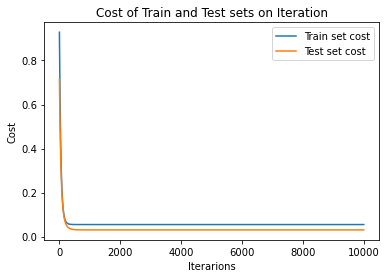

In [20]:
# include the plots for train and test set costs
plt.plot(cost_train, label='Train set cost')
plt.plot(cost_test, label='Test set cost')

# labels for the graph
plt.title('Cost of Train and Test sets on Iteration')
plt.xlabel('Iterarions')
plt.ylabel('Cost')
plt.legend()
plt.show()

Based on the graph, we can see that the cost function decreases as the number of iterations increase. With the use of gradient descent algorithm, it enables us to optimize the model to arrive at a lower cost for better optimization and accuracy on the response variable.

<a class="anchor" id="questions"></a>
## Questions 

### Q1

In [21]:
# run the gradient descent algorithm to plug in the optimized weights into the linear model
# for this case, we will use the initial weights that are 0s
init_w = np.array([0.0, 0.0, 0.0, 0.0])

# number of iterations is set to 50000
# learning rate is set to 0.01 
opt_w, cost = grad_descent(x_train, y_train, init_w, 50000, 0.01)
print("Weights: {}".format(opt_w))

# plug the weights into their respective places in the linear model
print("\nLinear Model:")
print("h_𝜃(x) = {} + {}*TV + {}*Radio + {}*Newspaper".format(opt_w[0], opt_w[1], opt_w[2], opt_w[3]))

Weights: [-0.00450541  0.75410425  0.54070185 -0.00344046]

Linear Model:
h_𝜃(x) = -0.004505413612382048 + 0.7541042545198685*TV + 0.5407018457412038*Radio + -0.00344046297798029*Newspaper


#### Q2: Provide a scatter plot of the ($\hat{y}^{(i)}$) 𝑎𝑛𝑑 ${y}^{(i)}$ for both the train and test set. Is there a trend? Provide an r2 score (also available in sklearn).

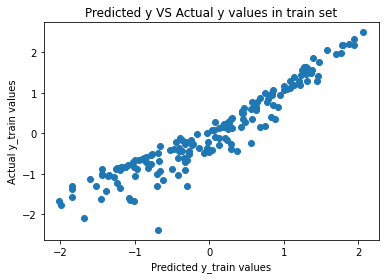

r2 score = 0.8950671598198965


In [22]:
# Scatter plot for predicted and actual y values of the train set
y_hat_train = predict(x_train, opt_w)

plt.scatter(y_hat_train, y_train)
plt.xlabel('Predicted y_train values')
plt.ylabel('Actual y_train values')
plt.title('Predicted y VS Actual y values in train set')
plt.show()

# r2 score for the train set
r2_train = r2_score(y_train, y_hat_train)
print("r2 score = {}".format(r2_train))

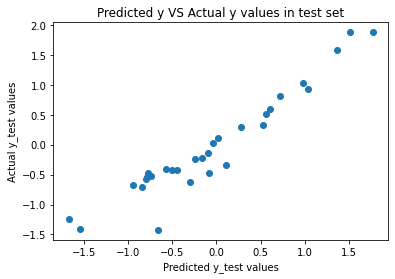

r2 score = 0.9140334672656092


In [23]:
# Scatter plot for predicted and actual y values of the train set
y_hat_test = predict(x_test, opt_w)

plt.scatter(y_hat_test, y_test)
plt.xlabel('Predicted y_test values')
plt.ylabel('Actual y_test values')
plt.title('Predicted y VS Actual y values in test set')
plt.show()

# r2 score for the train set
r2_test = r2_score(y_test, y_hat_test)
print("r2 score = {}".format(r2_test))

Based on the graphs we have created for the train and test set, we can see that there is an upward trend for both of the sets on the predicted values to the actual ones. We can imply that as the actual y values get higher, we can also expect an increase in the predicted y values.

For the r2 score, both test and train sets have a relatively high score which we can say that there is a high level of correlation with the predicted and actual y values. In addition, the test set's r2 score is greater than that of the train set's which means that our test set is more accurate in predicting the values.

#### Q3: What happens to the error, r2, and cost as the number of iterations increase? Show your data and proof. You can alternatively plot your result data for visualization and check until 50000 iterations or more (actually)

We will be varying our iterations in 10, 100, 1000, 5000, 10000, 50000, 80000

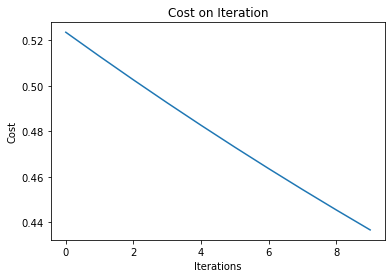

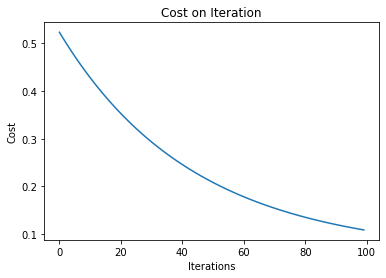

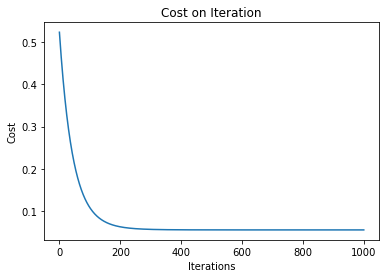

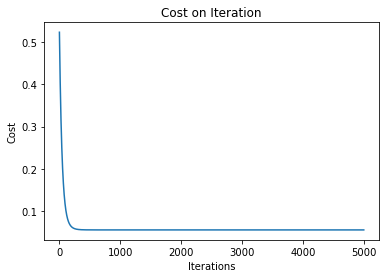

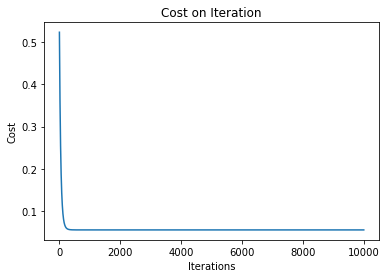

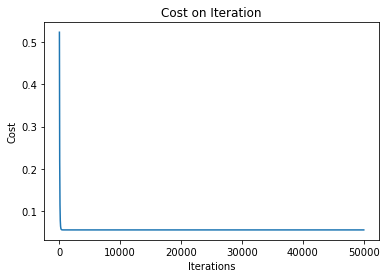

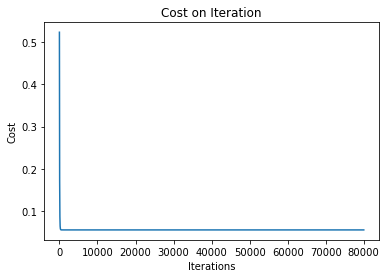

In [24]:
# initialize lists for summary later
iterations_list = [10, 100, 1000, 5000, 10000, 50000, 80000]
mse_list = []
cost_list = []
r2_list = []

# we will have a constant learning rate of 0.01
# run the different elements for the number of iterations
for i in iterations_list:
    # run the GDA with init_w = 0 and a constant learning rate
    iter_weights, iter_cost = grad_descent(x_train, y_train, init_w, i, 0.01) 
    plot_costs(iter_cost)  # plot the cost on each iteration
    cost_list.append(iter_cost[-1]) # add the cost per iteration
    
    # get the error per iteration
    y_pred = predict(x_train, iter_weights)
    MSE = mean_squared_error(y_train, y_pred)
    mse_list.append(MSE)
    
    # get r2 score per iteration
    iter_r2 = r2_score(y_train, y_pred)
    r2_list.append(iter_r2)

In [25]:
# create df to show the cost, error, and r2 score of the different iterations
iter_summary_df= pd.DataFrame({'Iterations':iterations_list, 'MSE':mse_list, 'Cost':cost_list, 'R2':r2_list})

# added styling to show 15 decimal points for better analysis
iter_summary_df2 = iter_summary_df.style.format({'Iterations': '{}', 'MSE':'{:.15f}', 'Cost':'{:.15f}', 'R2':'{:.15f}'})
iter_summary_df2

,Iterations,MSE,Cost,R2
0,10,0.856302190442955,0.436703947225544,0.182058041536763
1,100,0.215192719136949,0.108705998496614,0.794447385394571
2,1000,0.109854181588722,0.054927091786890,0.895067015550229
3,5000,0.109854030553027,0.054927015276514,0.895067159819896
4,10000,0.109854030553027,0.054927015276514,0.895067159819896
5,50000,0.109854030553027,0.054927015276514,0.895067159819896
6,80000,0.109854030553027,0.054927015276514,0.895067159819896


Based on the summary df we have created for the different number of iterations and having a constant learning rate for the analysis, we can see that as the number of iterations increase, both the error and cost tend to decrease while the r2 score increases. At some point, the values for the error, cost, and r2 score would get constant as the number of iterations would increase at a higher value (i.e from 5000-80 000 iterations). This may imply that running a large number for iterations may produce almost similar results so it doesn't necessarily mean that larger values for iterations would make the model more accurate.

***Determining the optimal iteration***

To determine the optimal iteration, we will find the minimal cost value generated from the gradient descent algorithm

In [26]:
# Determine the optimal iteration
# init_w = 0 for all weights
# set the iteration to 60,000
# set learning rate as 0.01
iter_weights, iter_cost = grad_descent(x_train, y_train, init_w, 60000, 0.01) 

# locate the minimum value of the cost in the iter_cost list using min()
# this enables us to get the optimal iteration with the lowest cost
opt_iter = iter_cost.index(min(iter_cost))

print("Optimal iteration: {}".format(opt_iter))
print("Minimal Cost: {}".format(iter_cost[opt_iter]))

Optimal iteration: 4149
Minimal Cost: 0.0549270152765135


Basing from the previous summary results on the number of iterations, at around iterations = 1000, we had the cost value to be 0.054927091786890. At this iteration, it had the least cost value. In finding the optimal iteration, we attained it to be at 4149th iteration which gave us the cost of 0.0549270152765135 which is less than the cost value at 1000th iteration.

#### Q4: Once you determine the optimal number of iterations, check the effect on the cost and error as you change the learning rate. The common learning rates in machine learning include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE PLOT. Provide your analysis.

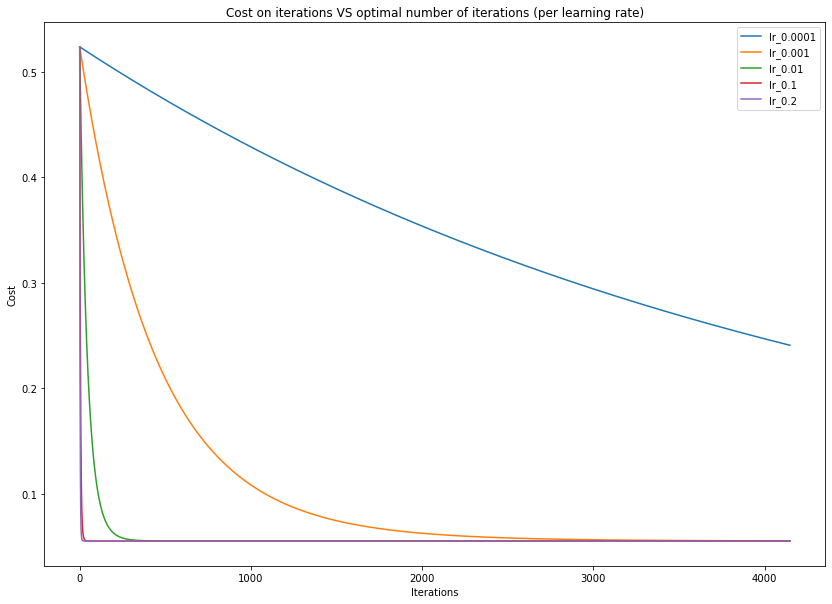

In [27]:
# order the learning rate in ascending order for better visualization later on 
lr_list = [0.0001, 0.001, 0.01, 0.1, 0.2]

# create a df to store the costs and for the visualization later
lr_df = pd.DataFrame()

# calculate costs of the GDA with varying learning rate
# number of iterations used here is the optimal number of iterations
for i in lr_list:
    lr_weights, lr_costs = grad_descent(x_train, y_train, init_w, opt_iter, i)
    
    # store the costs in their respective lr columns
    col_name = 'lr_'
    lr_df['lr_'+str(i)] = lr_costs

# show the cost on iterations on the different learning rate values 
lr_df.plot(figsize=(14,10), legend=True)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost on iterations VS optimal number of iterations (per learning rate)')
plt.show()

Based on the graph, we can see that a lower learning rate value means that it would take a greater number of iterations before being able to minimize the cost (refer to lr_0.0001 line) whereas a higher learning rate value shows that it would need a lesser amount number of iterations to attain the minimized cost. In addition, taking a large learning rate value would show a steeper line, which may miss out the true minimized cost of a dataset. 

#### Q5: Is there a relationship on the learning rate and the number of iterations?

The relationship on the learning rate and the number of iterations could be described as an inverse relationship because having a lower learning rate value would need a bigger number of iterations to be able to find the minimal cost to have an optimized model for prediction. On the other hand, having a larger learning rate would lessen the needed number of iterations to find the minimal cost for the optimized solution but there is a risk of taking bigger steps for optimizing the model since it may miss the true minimized cost value.  

#### Q6: Compare the results with the results of ordinary least squares function.

In [30]:
# executing sklearn's OLS to be used for comparison with our implemented gradient descent algorithm
sklearn_lin_reg = LinearRegression()
sklearn_lin_reg.fit(x_train, y_train)

r2_ols = sklearn_lin_reg.score(x_train, y_train)
y_train_pred = sklearn_lin_reg.predict(x_train)

print('Intercept: ', sklearn_lin_reg.intercept_)
print('Coefficients: ', sklearn_lin_reg.coef_[1:])

# r2 score of GDA
r2_gda = r2_score(y_train, y_hat_train)

Intercept:  -0.004505413612382142
Coefficients:  [ 0.75410425  0.54070185 -0.00344046]


In [31]:
print("OLS R2 Score = ", r2_ols)
print("GDA R2 Score = ", r2_gda)

print("\n OLS coefficients: ", sklearn_lin_reg.coef_[1:])
print("\n GDA coefficients: ", opt_w[1:])

OLS R2 Score =  0.8950671598198965
GDA R2 Score =  0.8950671598198965

 OLS coefficients:  [ 0.75410425  0.54070185 -0.00344046]

 GDA coefficients:  [ 0.75410425  0.54070185 -0.00344046]


By using Sklearn's OLS function, we can compare that to the implemented gradient descent algorithm. Based on the r2 score, both implementations attained the same value which is 0.89507. We can imply that there is no difference with regards to implementing to find the optimized model when using Sklearn's OLS and our implemented gradient descent algorithm